<a href="https://colab.research.google.com/github/rohithhhhhhhhhhh/Telugu-song-mood-classsification/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML MODEL

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import nltk

# LOADING THE DATASET

In [ ]:
#loading the dataset
df = pd.read_csv("binary_with_artist.csv", low_memory=False)
#df = pd.read_csv("binary.csv", low_memory=False)
df.head()

,index,name,mood,year,artist,lyrics,ఓం,సర్వాణి,రుద్రాణి,ఆర్యని,...,Srinivasan,G.,Ali,Gantasala,Deepu,Anurag,V.,Manisha,Mallikharjun,Suchith
0,1,Om Sarvani,Devotional,2014,M.M.Mansi,ఓం సర్వాణి ఓం రుద్రాణి ఓం ఆర్యని వందనం ఓం కళ్య...,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Omkareswari,Devotional,2011,"Shankar Mahadevan , M.M.Keeravani",హరి ఓం హరి ఓం హరి ఓం హరి ఓం హరి ఓం హరి ఓం హరి ...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Bham Bham Bole,Devotional,2002,"Shankar Mahadevan , Hariharan",భంభం భోలే శంఖం మోగేలే ఢంఢం ఢోలే చలరేగిందిలే భం...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Shiva Shiva Shankara,Devotional,2012,Shankar Mahadevan,భం భం భో … భం భం భో భం భం భో … భం భం భో భం భం ...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Mukundha Mukundha,Devotional,2008,"Himesh Reshmmiya , Sadhana Sargam",ముకుందా ముకుందా కృష్ణా ముకుందా ముకుందా స్వరంలో...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['index', 'name ', 'mood', 'year', 'artist', 'lyrics', 'ఓం', 'సర్వాణి',
       'రుద్రాణి', 'ఆర్యని',
       ...
       'Srinivasan', 'G.', 'Ali', 'Gantasala', 'Deepu', 'Anurag', 'V.',
       'Manisha', 'Mallikharjun', 'Suchith'],
      dtype='object', length=16244)

In [ ]:
y=df.mood #mood of song
X=df.drop(['index', 'name ', 'mood', 'year', 'artist', 'lyrics'], axis=1)

In [ ]:
#dividing the dataset into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Predict on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression model
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

  Devotional       0.88      0.70      0.78        10
    Romantic       0.17      0.18      0.17        11
   Romantic        0.20      0.20      0.20        10
         Sad       0.70      0.39      0.50        18
      Upbeat       0.64      0.95      0.77        19

    accuracy                           0.53        68
   macro avg       0.52      0.48      0.48        68
weighted avg       0.55      0.53      0.52        68

Confusion Matrix:
[[ 7  0  0  1  2]
 [ 0  2  3  2  4]
 [ 0  6  2  0  2]
 [ 1  4  4  7  2]
 [ 0  0  1  0 18]]


In [ ]:
# Step 2: Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("\nSVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.4852941176470588
              precision    recall  f1-score   support

  Devotional       0.75      0.60      0.67        10
    Romantic       0.14      0.18      0.16        11
   Romantic        0.11      0.10      0.11        10
         Sad       0.73      0.44      0.55        18
      Upbeat       0.62      0.84      0.71        19

    accuracy                           0.49        68
   macro avg       0.47      0.43      0.44        68
weighted avg       0.51      0.49      0.48        68

Confusion Matrix:
[[ 6  0  1  1  2]
 [ 0  2  3  2  4]
 [ 0  7  1  0  2]
 [ 1  4  3  8  2]
 [ 1  1  1  0 16]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'sag']  # Add 'sag' solver as an option
}

# Create a Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)  # Increase max_iter

# Create a grid search object
grid_search = GridSearchCV(lr_model, param_grid, scoring='accuracy', cv=5)

# Scale the data (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print(f"Best Logistic Regression Accuracy: {best_accuracy}")

# Use the best model for prediction on test data
y_pred_lr = best_model.predict(X_test_scaled)

# Evaluate the best Logistic Regression model
# ... (rest of your evaluation code)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Logistic Regression Accuracy: 0.49412997903563943


In [ ]:
# Save the models (optional)
import pickle
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression with Cross-Validation
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy for Logistic Regression: {scores.mean()}")

# SVM with Cross-Validation
svm_model = SVC(kernel='linear', class_weight='balanced')
scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy for SVM: {scores_svm.mean()}")


Cross-Validation Accuracy for Logistic Regression: 0.5457857769973661
Cross-Validation Accuracy for SVM: 0.5458296751536436


----

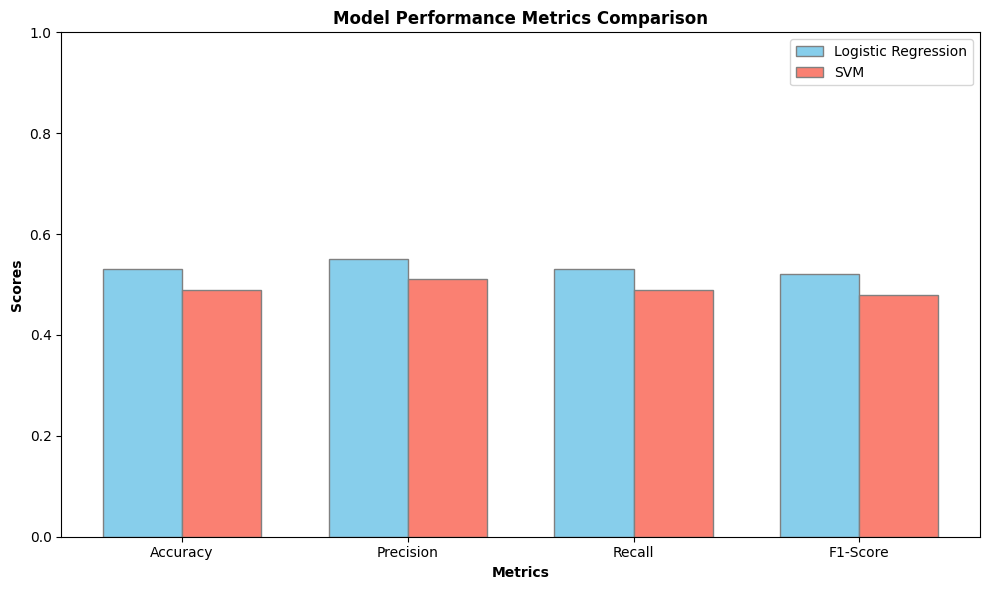

In [ ]:
# Step 1: Install Required Libraries (Uncomment the line below if needed)
# !pip install matplotlib numpy

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Define Your Data
# Model Names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Metrics for each model
logistic_regression = [0.53, 0.55, 0.53, 0.52]  # Blue
svm = [0.49, 0.51, 0.49, 0.48]  # Red

# Setting the width of the bars
bar_width = 0.35  # Width for the bars

# Step 4: Set Positions of the Bar Groups
r1 = np.arange(len(metrics))  # Positions for Logistic Regression
r2 = [x + bar_width for x in r1]  # Positions for SVM

# Step 5: Create the Bar Graph
plt.figure(figsize=(10, 6))

# Create bars
plt.bar(r1, logistic_regression, color='skyblue', width=bar_width, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, svm, color='salmon', width=bar_width, edgecolor='grey', label='SVM')

# Adding labels
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Metrics Comparison', fontweight='bold')

# Set x-ticks to show the metric names
plt.xticks([r + bar_width / 2 for r in range(len(metrics))], metrics)

# Set y-axis limits for better visibility
plt.ylim(0, 1)  # Set the y-axis range to 0-1

# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.show()
